In [1]:
# Author       : Utkarsh Kulshrestha
# E-Mail       : kuls.utkarsh1205@gmail.com
# Contact      : +91-8197094433
# Designation  : Artificial Intelligence Engineer

## Import the required libraries

In [2]:
import time
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

## Read the Data from the CSV

In [3]:
dummy_df = pd.read_csv("bank.csv", na_values =['NA'])
col_temp = dummy_df.columns.values
col_temp

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'deposit'],
      dtype=object)

In [4]:
dummy_df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

## Data Cleaning

In [5]:
dummy_df.drop_duplicates(inplace=True)
dummy_df.shape

(11162, 17)

In [6]:
Q1 = dummy_df.quantile(0.25)
Q3 = dummy_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age           17.00
balance     1586.00
day           14.00
duration     358.00
campaign       2.00
pdays         21.75
previous       1.00
dtype: float64


In [7]:
print(dummy_df['balance'].skew())
dummy_df['balance'].describe()

8.224619112755489


count    11162.000000
mean      1528.538524
std       3225.413326
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64

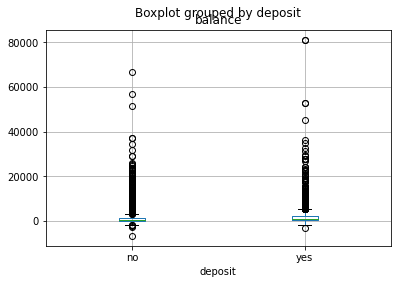

In [8]:
dummy_df.boxplot('balance',by='deposit')
plt.show()

In [9]:
upper = np.where(dummy_df["balance"] <= (Q1.balance-1.5*IQR.balance))
lower = np.where(dummy_df["balance"] >= (Q3.balance+1.5*IQR.balance))

In [10]:
''' Removing the Outliers '''
dummy_df.drop(upper[0], inplace = True)
dummy_df.drop(lower[0], inplace = True)
print("New Shape: ", dummy_df.shape) 

New Shape:  (10106, 17)


## Data Pre-Processing

In [11]:
contact_df = dummy_df

In [12]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['job'] = le.fit_transform(res_df['job'])
    res_df['marital'] = le.fit_transform(res_df['marital'])
    res_df['education'] = le.fit_transform(res_df['education'])
    res_df['default'] = le.fit_transform(res_df['default'])
    res_df['housing'] = le.fit_transform(res_df['housing'])
    res_df['month'] = le.fit_transform(res_df['month'])
    res_df['loan'] = le.fit_transform(res_df['loan'])
    res_df['contact'] = le.fit_transform(res_df['contact'])
    res_df['day_of_week'] = le.fit_transform(res_df['day'])
    res_df['poutcome'] = le.fit_transform(res_df['poutcome'])
    res_df['deposit'] = le.fit_transform(res_df['deposit'])
    return res_df

In [13]:
encoded_df = preprocessor(contact_df)

x = encoded_df.drop(['deposit'],axis =1).values
y = encoded_df['deposit'].values

## Split the data into Train-Test

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2)

## Build the Decision Tree Model

In [15]:
# Decision tree with depth = 2
model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=2)
model_dt_2.fit(x_train, y_train)
model_dt_2_score_train = model_dt_2.score(x_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(x_test, y_test)
print("Testing score: ",model_dt_2_score_test)
#y_pred_dt = model_dt_2.predict_proba(x_test)[:, 1]

Training score:  0.7485155863433943
Testing score:  0.7537091988130564


In [16]:
# Decision tree with depth = 4
model_dt_4 = DecisionTreeClassifier(random_state=1, max_depth=4)
model_dt_4.fit(x_train, y_train)
model_dt_4_score_train = model_dt_4.score(x_train, y_train)
print("Training score: ",model_dt_4_score_train)
model_dt_4_score_test = model_dt_4.score(x_test, y_test)
print("Testing score: ",model_dt_4_score_test)


Training score:  0.7895843641761504
Testing score:  0.7804154302670623


In [17]:
# Decision tree with depth = 8
model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=8, criterion = "gini")
model_dt_8.fit(x_train, y_train)
model_dt_8_score_train = model_dt_8.score(x_train, y_train)
print("Training score: ",model_dt_8_score_train)
model_dt_8_score_test = model_dt_8.score(x_test, y_test)
print("Testing score: ",model_dt_8_score_test)
y_pred_dt_8 = model_dt_8.predict_proba(x_test)[:, 1]

Training score:  0.8562592775853538
Testing score:  0.8283877349159249


## Using GridSearchCV

In [18]:
fit_dt = DecisionTreeClassifier(random_state=1)

In [19]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2,4,6,8,10,12],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'min_samples_leaf':[2,4,6,8,10,12,14,16],
              'min_samples_split':[2,4,6,8,10,12,14,16],
              'criterion': ['gini', 'entropy']}

cv_dt = GridSearchCV(fit_dt, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_dt.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_dt.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'entropy', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 16, 'min_samples_split': 2}
Time taken in grid search:  216.45


In [20]:
# def model_var(n):
model_dt_11 = DecisionTreeClassifier(random_state=1,max_depth=10 ,min_samples_leaf=15,criterion = "gini")
model_dt_11.fit(x_train, y_train)
model_dt_11_score_train = model_dt_11.score(x_train, y_train)
print("Training score: ", model_dt_11_score_train)
model_dt_11_score_test = model_dt_11.score(x_test, y_test)
print("Testing score: ", model_dt_11_score_test)
y_pred_dt_11 = model_dt_11.predict_proba(x_test)[:, 1]
# print("Iteration = ",n)

Training score:  0.8520534388916378
Testing score:  0.8264094955489614


### Finding values by loop

In [21]:
# for i in range(1,30):
#     model_var(i)

## Tree Representation

In [22]:
text_representation = tree.export_text(model_dt_11)
print(text_representation)

|--- feature_11 <= 360.50
|   |--- feature_13 <= 17.50
|   |   |--- feature_8 <= 1.50
|   |   |   |--- feature_11 <= 115.50
|   |   |   |   |--- feature_10 <= 9.50
|   |   |   |   |   |--- feature_11 <= 77.50
|   |   |   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_3 >  1.50
|   |   |   |   |   |   |   |--- feature_11 <= 62.50
|   |   |   |   |   |   |   |   |--- feature_0 <= 53.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_0 >  53.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_11 >  62.50
|   |   |   |   |   |   |   |   |--- feature_16 <= 12.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_16 >  12.50
|   |   |   |   |   |   |   |   |   |--- feature_10 <= 4.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_10 >  4.50

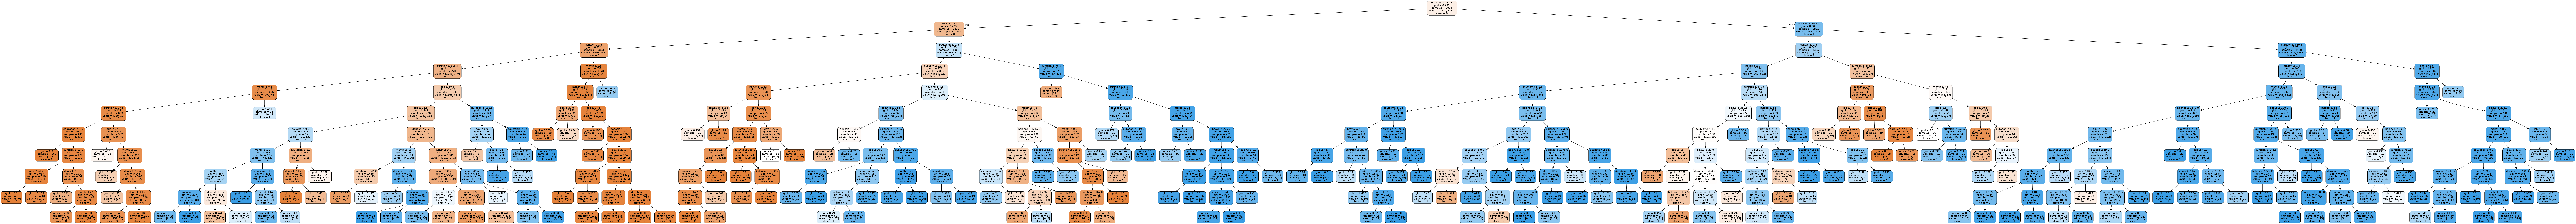

In [37]:
dot_data = StringIO()
export_graphviz(model_dt_11, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = col_temp,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('bank.png')
Image(graph.create_png())


In [24]:
#Decision tree
model_dt = DecisionTreeClassifier(max_depth = 8, criterion ="entropy")
model_dt.fit(x_train, y_train)
y_pred_dt_8 = model_dt.predict_proba(x_test)[:, 1]

model_dt_score_train = model_dt.score(x_train,y_train)
print("model_dt_score_train " ,model_dt_score_train)
model_dt_score_test = model_dt.score(x_test,y_test)
print("model_dt_score_test " ,model_dt_score_test)

model_dt_score_train  0.8515586343394359
model_dt_score_test  0.8303659742828883


## Performance Metrics

In [25]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt_11)
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [26]:
predictions = model_dt_11.predict(x_test)
predictions

array([1, 1, 0, ..., 1, 1, 1])

In [27]:
for i in range(len(predictions)):
    if(predictions[i] == 1):
        y_actual_result = np.vstack((predictions[i], y_test[i]))

## Recall

In [28]:
#Recall
y_actual_result = y_actual_result.flatten()
count = 0
for result in y_actual_result:
     if(result == 1):
        count=count+1

print ("true yes|predicted yes:")
print (count/float(len(y_actual_result)))

true yes|predicted yes:
1.0


## Area Under the Curve

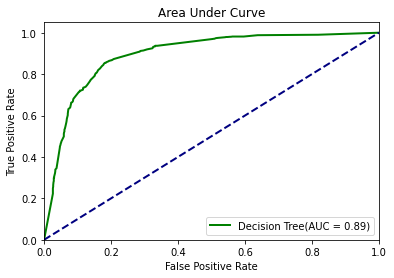

In [29]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

## Confusion Matrix

In [2]:
print (confusion_matrix(y_test, predictions))

NameError: name 'confusion_matrix' is not defined

In [31]:
# Previous
# print (confusion_matrix(y_test, predictions))
# [[964 198]
#  [213 858]]

In [32]:
accuracy_score(y_test, predictions)

0.8264094955489614

In [33]:
ds= {'Actual' : y_test,'Predict' : predictions}
y_df = pd.DataFrame(ds)
y_df.to_csv('result_data.csv',index=False)

In [34]:
# Previous
# accuracy_score(y_test, predictions)
# 0.8159426780116436

In [35]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

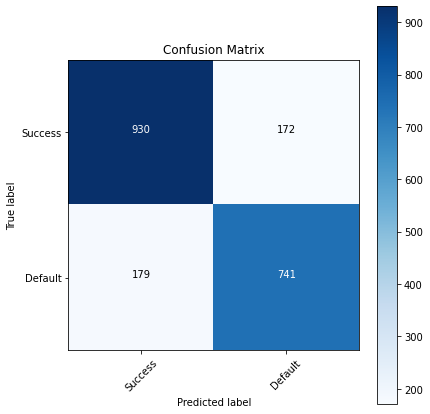

In [36]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()